<a href="https://colab.research.google.com/github/GiselyKCosta/Challenge_TelecomX_BR/blob/main/TelecomX_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#üìå Extrac√£o

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"
dados_raw = pd.read_json(url)
dados = pd.DataFrame(dados_raw)
dados

customerID Churn                                           customer  \
0     0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1     0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2     0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3     0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4     0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   
...          ...   ...                                                ...   
7262  9987-LUTYD    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
7263  9992-RRAMN   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7264  9992-UJOEL    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7265  9993-LHIEB    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7266  9995-HOTOH    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   

                                                  phone  \
0        {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1       {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2        {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3        {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4        {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
...                                                 ...   
7262     {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
7263    {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
7264     {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
7265     {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
7266  {'PhoneService': 'No', 'MultipleLines': 'No ph...   

                                               internet  \
0     {'InternetService': 'DSL', 'OnlineSecurity': '...   
1     {'InternetService': 'DSL', 'OnlineSecurity': '...   
2     {'InternetService': 'Fiber optic', 'OnlineSecu...   
3     {'InternetService': 'Fiber optic', 'OnlineSecu...   
4     {'InternetService': 'Fiber optic', 'OnlineSecu...   
...                                                 ...   
7262  {'InternetService': 'DSL', 'OnlineSecurity': '...   
7263  {'InternetService': 'Fiber optic', 'OnlineSecu...   
7264  {'InternetService': 'DSL', 'OnlineSecurity': '...   
7265  {'InternetService': 'DSL', 'OnlineSecurity': '...   
7266  {'InternetService': 'DSL', 'OnlineSecurity': '...   

                                                account  
0     {'Contract': 'One year', 'PaperlessBilling': '...  
1     {'Contract': 'Month-to-month', 'PaperlessBilli...  
2     {'Contract': 'Month-to-month', 'PaperlessBilli...  
3     {'Contract': 'Month-to-month', 'PaperlessBilli...  
4     {'Contract': 'Month-to-month', 'PaperlessBilli...  
...                                                 ...  
7262  {'Contract': 'One year', 'PaperlessBilling': '...  
7263  {'Contract': 'Month-to-month', 'PaperlessBilli...  
7264  {'Contract': 'Month-to-month', 'PaperlessBilli...  
7265  {'Contract': 'Two year', 'PaperlessBilling': '...  
7266  {'Contract': 'Two year', 'PaperlessBilling': '...  

[7267 rows x 6 columns]

In [ ]:
nomes_das_colunas = list(dados.columns)
print(nomes_das_colunas)

#Separar custumer
customer = dados['customer'].apply(pd.Series)
customer
dados_expanded = dados.drop(columns='customer').join(customer)
dados_expanded

#Separar phone
phone = dados['phone'].apply(pd.Series)
phone
dados_expanded = dados_expanded.drop(columns='phone').join(phone)
dados_expanded

#Separar internet
internet = dados['internet'].apply(pd.Series)
internet
dados_expanded = dados_expanded.drop(columns='internet').join(internet)
dados_expanded

#Separar account
account = dados['account'].apply(pd.Series)
account
dados_expanded = dados_expanded.drop(columns='account').join(account)
dados_expanded

#Separar Charges
charges = dados_expanded['Charges'].apply(pd.Series)
charges
dados_expanded = dados_expanded.drop(columns='Charges').join(charges)
dados_expanded

dados_expanded = dados_expanded.rename(columns={'Monthly': 'Charges_Monthly', 'Total': 'Charges_Total'})

nomes_das_colunas = list(dados_expanded.columns)
print(nomes_das_colunas)

['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']
['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges_Monthly', 'Charges_Total']


In [ ]:
dados_reduzido = dados_expanded[[ 'Churn', 'gender', 'SeniorCitizen', 'tenure', 'PhoneService',  'InternetService',  'Contract','PaymentMethod','Charges_Monthly', 'Charges_Total']]
dados_reduzido

Churn  gender  SeniorCitizen  tenure PhoneService InternetService  \
0       No  Female              0       9          Yes             DSL   
1       No    Male              0       9          Yes             DSL   
2      Yes    Male              0       4          Yes     Fiber optic   
3      Yes    Male              1      13          Yes     Fiber optic   
4      Yes  Female              1       3          Yes     Fiber optic   
...    ...     ...            ...     ...          ...             ...   
7262    No  Female              0      13          Yes             DSL   
7263   Yes    Male              0      22          Yes     Fiber optic   
7264    No    Male              0       2          Yes             DSL   
7265    No    Male              0      67          Yes             DSL   
7266    No    Male              0      63           No             DSL   

            Contract     PaymentMethod  Charges_Monthly Charges_Total  
0           One year      Mailed check            65.60         593.3  
1     Month-to-month      Mailed check            59.90         542.4  
2     Month-to-month  Electronic check            73.90        280.85  
3     Month-to-month  Electronic check            98.00       1237.85  
4     Month-to-month      Mailed check            83.90         267.4  
...              ...               ...              ...           ...  
7262        One year      Mailed check            55.15         742.9  
7263  Month-to-month  Electronic check            85.10        1873.7  
7264  Month-to-month      Mailed check            50.30         92.75  
7265        Two year      Mailed check            67.85       4627.65  
7266        Two year  Electronic check            59.00        3707.6  

[7267 rows x 10 columns]

#üîß Transforma√ß√£o

In [ ]:
for col in dados_reduzido.columns:
    print(f"Coluna: {col}")
    print(dados_reduzido[col].unique())
    print("-" * 30)


Coluna: Churn
['No' 'Yes' '']
------------------------------
Coluna: gender
['Female' 'Male']
------------------------------
Coluna: SeniorCitizen
[0 1]
------------------------------
Coluna: tenure
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
------------------------------
Coluna: PhoneService
['Yes' 'No']
------------------------------
Coluna: InternetService
['DSL' 'Fiber optic' 'No']
------------------------------
Coluna: Contract
['One year' 'Month-to-month' 'Two year']
------------------------------
Coluna: PaymentMethod
['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
------------------------------
Coluna: Charges_Monthly
[65.6  59.9  73.9  ... 91.75 68.8  67.85]
------------------------------
Coluna: Charges_Total
['593.3' '542.4' '280.85' ... '742.9' '4627.65'

In [ ]:
dados_reduzido[[ 'Churn', 'gender', 'SeniorCitizen', 'tenure', 'PhoneService',  'InternetService',  'Contract', 'PaymentMethod', 'Charges_Monthly', 'Charges_Total']].isna().sum()

dados_reduzido['Churn'] = dados_reduzido['Churn'].replace('', np.nan)
dados_reduzido = dados_reduzido.dropna(subset=['Churn'])

/tmp/ipython-input-160-729907631.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_reduzido['Churn'] = dados_reduzido['Churn'].replace('', np.nan)


In [ ]:
for col in dados_reduzido.columns:
    print(f"Coluna: {col}")
    print(dados_reduzido[col].unique())
    print("-" * 30)

Coluna: Churn
['No' 'Yes']
------------------------------
Coluna: gender
['Female' 'Male']
------------------------------
Coluna: SeniorCitizen
[0 1]
------------------------------
Coluna: tenure
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0]
------------------------------
Coluna: PhoneService
['Yes' 'No']
------------------------------
Coluna: InternetService
['DSL' 'Fiber optic' 'No']
------------------------------
Coluna: Contract
['One year' 'Month-to-month' 'Two year']
------------------------------
Coluna: PaymentMethod
['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
------------------------------
Coluna: Charges_Monthly
[65.6  59.9  73.9  ... 91.75 68.8  67.85]
------------------------------
Coluna: Charges_Total
['593.3' '542.4' '280.85' ... '742.9' '4627.65' '3

In [ ]:
dados_reduzido['Charges_Total'].dtype

dados_reduzido['Charges_Total']= pd.to_numeric(dados_reduzido['Charges_Total'], errors='coerce')

/tmp/ipython-input-162-2540521523.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_reduzido['Charges_Total']= pd.to_numeric(dados_reduzido['Charges_Total'], errors='coerce')


In [ ]:
dados_reduzido['Charges_Total'].dtype

dtype('float64')

In [ ]:
dados_reduzido['Contas_Diarias'] = dados_reduzido['Charges_Monthly'] / 30
dados_reduzido

/tmp/ipython-input-164-2082944591.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_reduzido['Contas_Diarias'] = dados_reduzido['Charges_Monthly'] / 30


Churn  gender  SeniorCitizen  tenure PhoneService InternetService  \
0       No  Female              0       9          Yes             DSL   
1       No    Male              0       9          Yes             DSL   
2      Yes    Male              0       4          Yes     Fiber optic   
3      Yes    Male              1      13          Yes     Fiber optic   
4      Yes  Female              1       3          Yes     Fiber optic   
...    ...     ...            ...     ...          ...             ...   
7262    No  Female              0      13          Yes             DSL   
7263   Yes    Male              0      22          Yes     Fiber optic   
7264    No    Male              0       2          Yes             DSL   
7265    No    Male              0      67          Yes             DSL   
7266    No    Male              0      63           No             DSL   

            Contract     PaymentMethod  Charges_Monthly  Charges_Total  \
0           One year      Mailed check            65.60         593.30   
1     Month-to-month      Mailed check            59.90         542.40   
2     Month-to-month  Electronic check            73.90         280.85   
3     Month-to-month  Electronic check            98.00        1237.85   
4     Month-to-month      Mailed check            83.90         267.40   
...              ...               ...              ...            ...   
7262        One year      Mailed check            55.15         742.90   
7263  Month-to-month  Electronic check            85.10        1873.70   
7264  Month-to-month      Mailed check            50.30          92.75   
7265        Two year      Mailed check            67.85        4627.65   
7266        Two year  Electronic check            59.00        3707.60   

      Contas_Diarias  
0           2.186667  
1           1.996667  
2           2.463333  
3           3.266667  
4           2.796667  
...              ...  
7262        1.838333  
7263        2.836667  
7264        1.676667  
7265        2.261667  
7266        1.966667  

[7043 rows x 11 columns]

#üìä Carga e an√°lise

## Media geral

In [ ]:
tenure_media= dados_reduzido['tenure'].describe()
tenure_media


count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [ ]:
churn_media= dados_reduzido['Churn'].value_counts(normalize=True) * 100
churn_media

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

In [ ]:
churn_media_contract= dados_reduzido.groupby('Contract')['Churn'].value_counts(normalize=True) * 100
churn_media_contract

Contract        Churn
Month-to-month  No       57.290323
                Yes      42.709677
One year        No       88.730482
                Yes      11.269518
Two year        No       97.168142
                Yes       2.831858
Name: proportion, dtype: float64

In [ ]:
churn_contract = {
    ('Month-to-month', 'No'): 57.29,
    ('Month-to-month', 'Yes'): 42.71,
    ('One year', 'No'): 88.73,
    ('One year', 'Yes'): 11.27,
    ('Two year', 'No'): 97.17,
    ('Two year', 'Yes'): 2.83
}

df = pd.Series(churn_contract).unstack()
df = df[['No', 'Yes']]

df.columns = ['Churn: N√£o', 'Churn: Sim']


cores = ['#2e2e3a', '#bc5d2e']


ax = df.plot(kind='bar', stacked=True, figsize=(8, 6), color=cores)


for i, contrato in enumerate(df.index):
    nao = df.loc[contrato, 'Churn: N√£o']
    sim = df.loc[contrato, 'Churn: Sim']

    ax.text(i, nao / 2, f'{nao:.1f}%', ha='center', va='center', color='white', fontsize=10, fontweight='bold')
    ax.text(i, nao + sim / 2, f'{sim:.1f}%', ha='center', va='center', color='white', fontsize=10, fontweight='bold')


plt.title('Propor√ß√£o de Churn por Tipo de Contrato')
plt.ylabel('Propor√ß√£o (%)')
plt.xlabel('Tipo de Contrato')
plt.ylim(0, 100)
plt.legend(title='Situa√ß√£o de Churn')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

AttributeError: 'list' object has no attribute 'unstack'

In [ ]:
internet_media= dados_reduzido['InternetService'].value_counts(normalize=True) * 100
internet_media

InternetService
Fiber optic    43.958540
DSL            34.374556
No             21.666903
Name: proportion, dtype: float64

In [ ]:
payment_media= dados_reduzido. groupby('Churn')['PaymentMethod'].value_counts(normalize=True) * 100
payment_media

Churn  PaymentMethod            
No     Mailed check                 25.202938
       Electronic check             25.009664
       Credit card (automatic)      24.932354
       Bank transfer (automatic)    24.855044
Yes    Electronic check             57.303371
       Mailed check                 16.479401
       Bank transfer (automatic)    13.804173
       Credit card (automatic)      12.413055
Name: proportion, dtype: float64

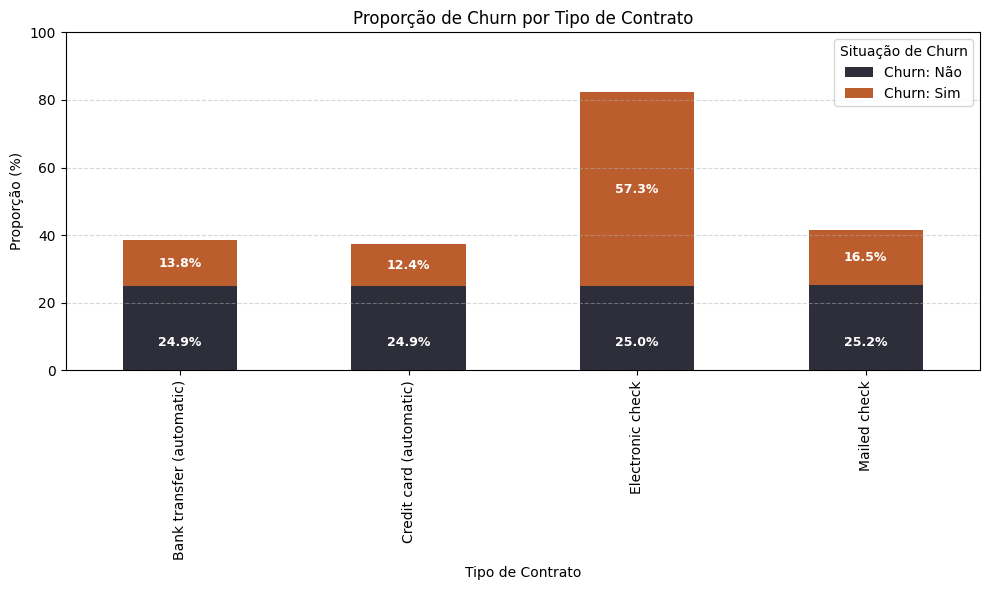

In [ ]:
df_payment = payment_media.unstack(level=0)


df_payment = df_payment[['No', 'Yes']]
df_payment.columns = ['Churn: N√£o', 'Churn: Sim']



cores = ['#2e2e3a', '#bc5d2e']


ax = df_payment.plot(kind='bar', stacked=True, figsize=(10, 6), color=cores)


for i, contrato in enumerate(df_payment .index):
    nao = df_payment .loc[contrato, 'Churn: N√£o']
    sim = df_payment .loc[contrato, 'Churn: Sim']

    if nao > 0:
        ax.text(i, nao / 3, f'{nao:.1f}%', ha='center', va='center', color='white', fontsize=9, fontweight='bold')

    if sim > 0:
        ax.text(i, nao + sim / 2, f'{sim:.1f}%', ha='center', va='center', color='white', fontsize=9, fontweight='bold')


plt.title('Propor√ß√£o de Churn por Tipo de Contrato')
plt.ylabel('Propor√ß√£o (%)')
plt.xlabel('Tipo de Contrato')
plt.ylim(0, 100)
plt.legend(title='Situa√ß√£o de Churn')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## M√©dias por g√™nero

In [ ]:
tenure_por_genero= dados_reduzido.groupby('gender' )['tenure'].describe()
tenure_por_genero



count       mean        std  min  25%   50%   75%   max
gender                                                          
Female  3488.0  32.244553  24.463233  0.0  9.0  29.0  55.0  72.0
Male    3555.0  32.495359  24.656359  0.0  9.0  29.0  56.0  72.0

/tmp/ipython-input-218-1041719125.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Male', 'Female'])


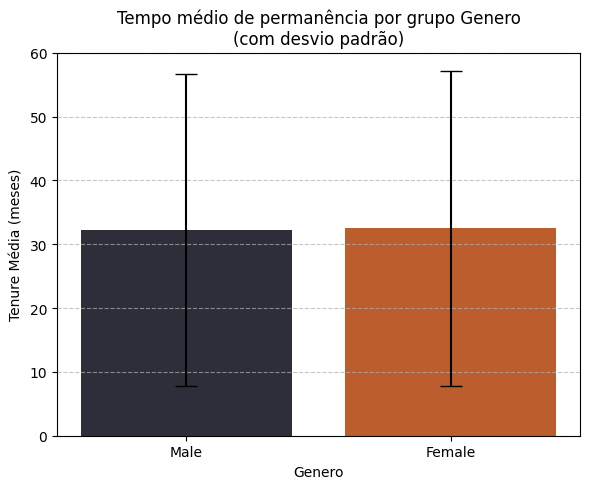

In [ ]:
means = tenure_por_genero['mean']
stds = tenure_por_genero['std']
groups = tenure_por_genero.index.astype(str)  # '0' e '1' como strings para legenda

fig, ax = plt.subplots(figsize=(6,5))

ax.bar(groups, means, yerr=stds, capsize=8, color=['#2e2e3a', '#bc5d2e'])

ax.set_xticklabels(['Male', 'Female'])
ax.set_ylabel('Tenure M√©dia (meses)')
ax.set_xlabel('Genero')
ax.set_title('Tempo m√©dio de perman√™ncia por grupo Genero\n(com desvio padr√£o)')
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
churn_por_genero= dados_reduzido.groupby('gender' )['Churn'].value_counts(normalize=True) * 100
churn_por_genero

gender  Churn
Female  No       73.079128
        Yes      26.920872
Male    No       73.839662
        Yes      26.160338
Name: proportion, dtype: float64

In [ ]:
contas_Diarias_por_genero= dados_reduzido.groupby('gender' )['Contas_Diarias'].describe()
contas_Diarias_por_genero

In [ ]:
charges_Total_por_genero= dados_reduzido.groupby('gender' )['Charges_Total'].describe()
charges_Total_por_genero

count         mean          std    min      25%      50%     75%  \
gender                                                                      
Female  3483.0  2283.190985  2270.830254  18.85  402.875  1387.35  3819.8   
Male    3549.0  2283.407861  2263.100874  18.80  397.000  1404.65  3771.5   

            max  
gender           
Female  8672.45  
Male    8684.80

## Medias Senior citizen

In [ ]:
tenure_por_SeniorCitizen= dados_reduzido.groupby('SeniorCitizen' )['tenure'].describe()
tenure_por_SeniorCitizen

count       mean        std  min   25%   50%   75%   max
SeniorCitizen                                                           
0              5901.0  32.192171  24.628639  0.0   9.0  28.0  55.0  72.0
1              1142.0  33.295972  24.188530  1.0  10.0  31.0  56.0  72.0

/tmp/ipython-input-214-1031951939.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['N√£o Idoso (0)', 'Idoso (1)'])


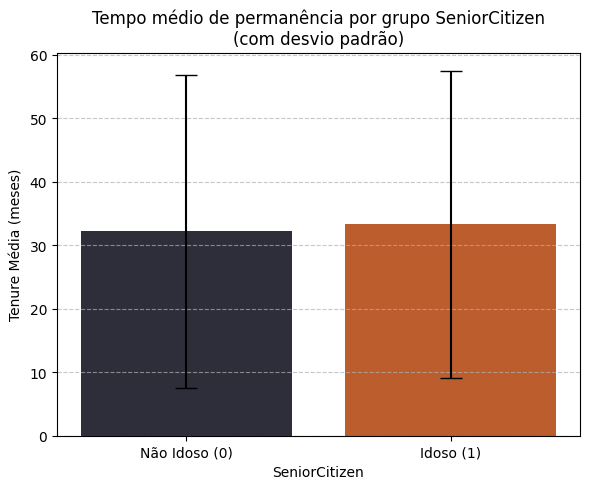

In [ ]:
means = tenure_por_SeniorCitizen['mean']
stds = tenure_por_SeniorCitizen['std']
groups = tenure_por_SeniorCitizen.index.astype(str)  # '0' e '1' como strings para legenda

fig, ax = plt.subplots(figsize=(6,5))

ax.bar(groups, means, yerr=stds, capsize=8, color=['#2e2e3a', '#bc5d2e'])

ax.set_xticklabels(['N√£o Idoso (0)', 'Idoso (1)'])
ax.set_ylabel('Tenure M√©dia (meses)')
ax.set_xlabel('SeniorCitizen')
ax.set_title('Tempo m√©dio de perman√™ncia por grupo SeniorCitizen\n(com desvio padr√£o)')
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
churn_por_SeniorCitizen= dados_reduzido.groupby('SeniorCitizen' )['Churn'].value_counts(normalize=True) * 100
churn_por_SeniorCitizen

SeniorCitizen  Churn
0              No       76.393832
               Yes      23.606168
1              No       58.318739
               Yes      41.681261
Name: proportion, dtype: float64

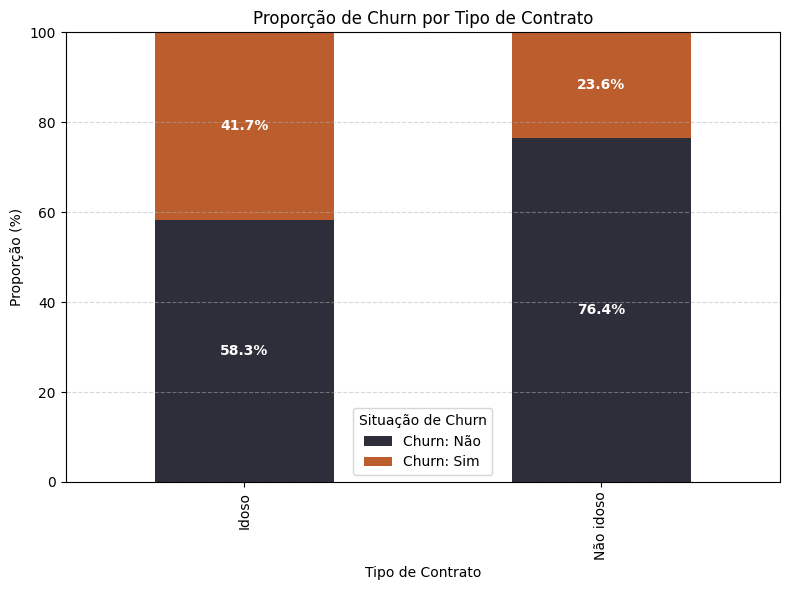

In [ ]:
senior_churn = {
    ("N√£o idoso", 'No'): 76.393832,
    ("N√£o idoso", 'Yes'): 23.606168,
    ("Idoso", 'No'): 58.318739,
    ("Idoso", 'Yes'): 41.681261
}

df = pd.Series(senior_churn).unstack()
df = df[['No', 'Yes']]

df.columns = ['Churn: N√£o', 'Churn: Sim']


cores = ['#2e2e3a', '#bc5d2e']


ax = df.plot(kind='bar', stacked=True, figsize=(8, 6), color=cores)


for i, contrato in enumerate(df.index):
    nao = df.loc[contrato, 'Churn: N√£o']
    sim = df.loc[contrato, 'Churn: Sim']

    ax.text(i, nao / 2, f'{nao:.1f}%', ha='center', va='center', color='white', fontsize=10, fontweight='bold')
    ax.text(i, nao + sim / 2, f'{sim:.1f}%', ha='center', va='center', color='white', fontsize=10, fontweight='bold')


plt.title('Propor√ß√£o de Churn por Tipo de Contrato')
plt.ylabel('Propor√ß√£o (%)')
plt.xlabel('Tipo de Contrato')
plt.ylim(0, 100)
plt.legend(title='Situa√ß√£o de Churn')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
contas_Diarias_SeniorCitizen= dados_reduzido.groupby('SeniorCitizen' )['Contas_Diarias'].describe()
contas_Diarias_SeniorCitizen

count      mean       std       min       25%       50%  \
SeniorCitizen                                                             
0              5901.0  2.061581  1.010535  0.608333  0.853333  2.193333   
1              1142.0  2.660679  0.792134  0.631667  2.338333  2.828333   

                    75%       max  
SeniorCitizen                      
0              2.890000  3.958333  
1              3.269167  3.915000

In [ ]:
charges_Total_SeniorCitizen= dados_reduzido.groupby('SeniorCitizen' )['Charges_Total'].describe()
charges_Total_SeniorCitizen

count         mean          std    min      25%       50%  \
SeniorCitizen                                                               
0              5890.0  2181.089550  2233.217848  18.80  365.575  1295.775   
1              1142.0  2810.465193  2364.314180  19.45  689.575  2263.750   

                     75%     max  
SeniorCitizen                     
0              3566.3625  8684.8  
1              4600.3125  8443.7

In [ ]:
contract_por_SeniorCitizen= dados_reduzido.groupby('SeniorCitizen')['Contract'].value_counts(normalize=True) * 100
contract_por_SeniorCitizen

SeniorCitizen  Contract      
0              Month-to-month    51.991188
               Two year          26.266734
               One year          21.742078
1              Month-to-month    70.665499
               One year          16.637478
               Two year          12.697023
Name: proportion, dtype: float64

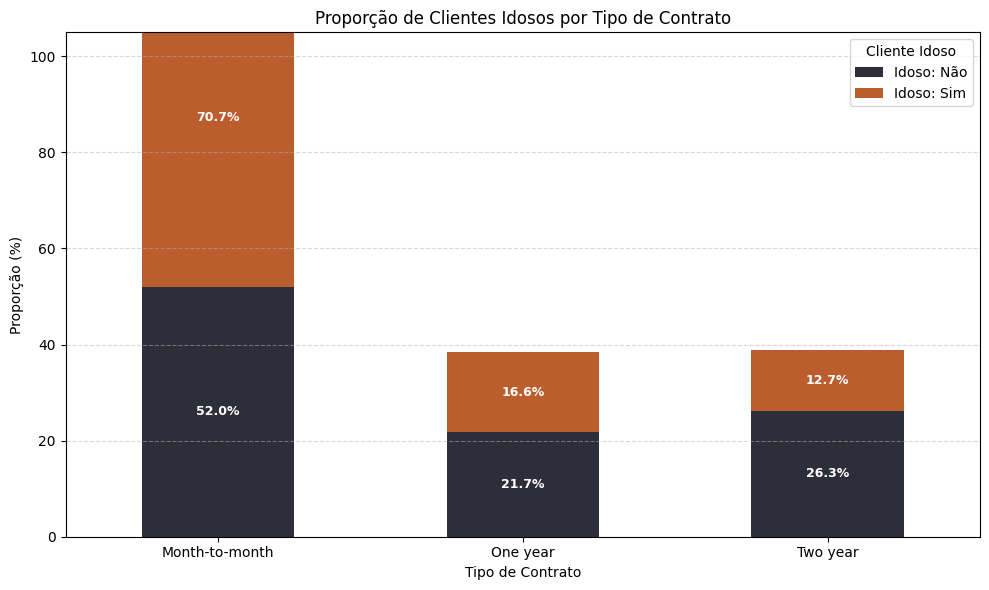

In [ ]:
df_senior_contract = contract_por_SeniorCitizen.unstack(level=0)

df_senior_contract.columns = ['Idoso: N√£o', 'Idoso: Sim']


cores = ['#2e2e3a', '#bc5d2e']


ax = df_senior_contract.plot(kind='bar', stacked=True, figsize=(10, 6), color=cores)


for i, contrato in enumerate(df_senior_contract.index):
    nao = df_senior_contract.loc[contrato, 'Idoso: N√£o']
    sim = df_senior_contract.loc[contrato, 'Idoso: Sim']


    pos_nao = nao / 2 if nao >= 5 else nao + 1
    ax.text(i, pos_nao, f'{nao:.1f}%', ha='center', va='center' if nao >= 5 else 'bottom',
            color='white' if nao >= 5 else 'black', fontsize=9, fontweight='bold')

    pos_sim = nao + sim / 2 if sim >= 5 else nao + sim + 1
    ax.text(i, pos_sim, f'{sim:.1f}%', ha='center', va='center' if sim >= 5 else 'bottom',
            color='white' if sim >= 5 else 'black', fontsize=9, fontweight='bold')

plt.title('Propor√ß√£o de Clientes Idosos por Tipo de Contrato')
plt.ylabel('Propor√ß√£o (%)')
plt.xlabel('Tipo de Contrato')
plt.ylim(0, 105)
plt.xticks(rotation=0)
plt.legend(title='Cliente Idoso')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
internet_por_SeniorCitizen= dados_reduzido.groupby('SeniorCitizen')['InternetService'].value_counts(normalize=True) * 100
internet_por_SeniorCitizen

SeniorCitizen  InternetService
0              Fiber optic        38.383325
               DSL                36.637858
               No                 24.978817
1              Fiber optic        72.767075
               DSL                22.679510
               No                  4.553415
Name: proportion, dtype: float64

In [ ]:
payment_senior= dados_reduzido. groupby('SeniorCitizen')['PaymentMethod'].value_counts(normalize=True) * 100
payment_senior

SeniorCitizen  PaymentMethod            
0              Electronic check             30.011862
               Mailed check                 25.724453
               Bank transfer (automatic)    22.216573
               Credit card (automatic)      22.047111
1              Electronic check             52.014011
               Bank transfer (automatic)    20.402802
               Credit card (automatic)      19.352014
               Mailed check                  8.231173
Name: proportion, dtype: float64

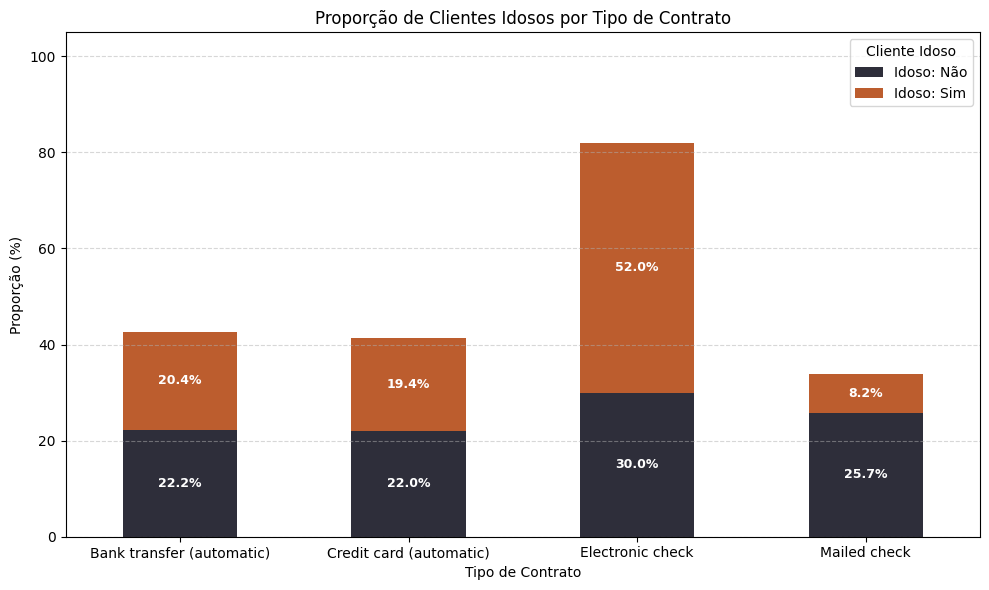

In [ ]:
df_senior_payment = payment_senior.unstack(level=0)

df_senior_payment.columns = ['Idoso: N√£o', 'Idoso: Sim']


cores = ['#2e2e3a', '#bc5d2e']


ax = df_senior_payment.plot(kind='bar', stacked=True, figsize=(10, 6), color=cores)


for i, contrato in enumerate(df_senior_payment.index):
    nao = df_senior_payment.loc[contrato, 'Idoso: N√£o']
    sim = df_senior_payment.loc[contrato, 'Idoso: Sim']


    pos_nao = nao / 2 if nao >= 5 else nao + 1
    ax.text(i, pos_nao, f'{nao:.1f}%', ha='center', va='center' if nao >= 5 else 'bottom',
            color='white' if nao >= 5 else 'black', fontsize=9, fontweight='bold')

    pos_sim = nao + sim / 2 if sim >= 5 else nao + sim + 1
    ax.text(i, pos_sim, f'{sim:.1f}%', ha='center', va='center' if sim >= 5 else 'bottom',
            color='white' if sim >= 5 else 'black', fontsize=9, fontweight='bold')

plt.title('Propor√ß√£o de Clientes Idosos por Tipo de Contrato')
plt.ylabel('Propor√ß√£o (%)')
plt.xlabel('Tipo de Contrato')
plt.ylim(0, 105)
plt.xticks(rotation=0)
plt.legend(title='Cliente Idoso')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#üìÑRelatorio Final

# Relat√≥rio de An√°lise de Evas√£o de Clientes (Churn) - TelecomX

---

## 1. Introdu√ß√£o

### Objetivo da An√°lise

O objetivo principal desta an√°lise √© compreender os fatores que contribuem para a evas√£o de clientes (Churn) na empresa de telecomunica√ß√µes **TelecomX**. Ao identificar padr√µes e caracter√≠sticas dos clientes que cancelam seus servi√ßos, a TelecomX pode desenvolver estrat√©gias mais eficazes para reten√ß√£o.

### Problema de Evas√£o de Clientes (Churn)

Churn refere-se √† taxa na qual os clientes cancelam ou descontinuam um servi√ßo.
Compreender **por que** os clientes saem √© o primeiro passo para desenvolver interven√ß√µes direcionadas e personalizadas que melhorem a satisfa√ß√£o e a lealdade do cliente.

---

## 2. Limpeza e Tratamento de Dados

 Os dados brutos foram obtidos a partir de um arquivo JSON hospedado no GitHub.

### Passos Realizados

- **Importa√ß√£o dos Dados:**  
  Dados importados diretamente de uma URL raw do GitHub utilizando `pd.read_json()`, carregando-os em um DataFrame do pandas.

- **Identifica√ß√£o e Separa√ß√£o de Colunas Aninhadas:**  
  Algumas colunas (`customer`, `phone`, `internet`, `account`) continham dados aninhados (dicion√°rios ou listas representadas como strings), que precisaram ser expandidas em novas colunas.

- **Metodologia para Expans√£o:**  
  - Uso de `.apply(pd.Series)` para expandir as chaves do dicion√°rio em colunas distintas.  
  - Concatena√ß√£o do DataFrame expandido ao DataFrame principal.  
  - Remo√ß√£o das colunas originais para evitar redund√¢ncia.

- **Renomea√ß√£o e Sele√ß√£o de Colunas:**  
  As colunas `Monthly` e `Total` foram renomeadas para `Charges_Monthly` e `Charges_Total`, respectivamente. Foi selecionado um subconjunto de colunas relevantes, formando o `dados_reduzido`.

### Tratamento de Valores Ausentes e Tipos de Dados

- Na coluna `Churn`, valores em branco foram substitu√≠dos por `np.nan` e linhas com `NaN` foram removidas, pois `Churn` √© a vari√°vel alvo.

- A coluna `Charges_Total` foi convertida de `object` para num√©rico (`float64`), com coer√ß√£o de erros para `NaN`.

- Foi criada uma nova feature, `Contas_Diarias`, dividindo `Charges_Monthly` por 30.

---

## 3. An√°lise Explorat√≥ria de Dados (EDA)

A an√°lise foi realizada para entender caracter√≠sticas dos clientes e identificar padr√µes relacionados ao churn.

### 3.1 Tempo de Perman√™ncia (Tenure) por G√™nero

- Tempo m√©dio similar entre mulheres (32,24 meses) e homens (32,49 meses), com desvios padr√£o pr√≥ximos.  
- Sugere que o g√™nero n√£o √© um fator forte na dura√ß√£o do contrato.

### 3.2 Taxa de Churn por G√™nero

| G√™nero  | N√£o Churn (%) | Sim Churn (%) |
|---------|---------------|---------------|
| Mulheres| 73,08         | 26,92         |
| Homens  | 73,84         | 26,16         |

- Taxas bastante similares entre g√™neros, refor√ßando que g√™nero n√£o √© um discriminador prim√°rio.

### 3.3 Tempo de Perman√™ncia por SeniorCitizen (Idosos)

- Idosos: 33,29 meses  
- N√£o idosos: 32,19 meses  
- Pequena diferen√ßa, indicando maior estabilidade dos clientes idosos.

### 3.4 Propor√ß√£o de Churn por SeniorCitizen

- **Clientes idosos (SeniorCitizen=1):** 41,68% de churn  
- **Clientes n√£o idosos (SeniorCitizen=0):** 23,61% de churn  

Indicando que idosos s√£o um grupo de alto risco para evas√£o.

### 3.5 Propor√ß√£o de Clientes Idosos por Tipo de Contrato

- **Idosos:** 70,67% em contratos "Month-to-month" (m√™s a m√™s).  
- **N√£o idosos:** Distribui√ß√£o entre "Month-to-month" (51,99%), "One year" (21,74%) e "Two year" (26,27%).  

Contratos sem fidelidade predominam entre idosos, aumentando risco de churn.

### 3.6 Propor√ß√£o de Clientes Idosos por Servi√ßo de Internet

- 72,77% dos idosos utilizam "Fiber optic".  
- N√£o idosos dividem-se entre "Fiber optic" (38,38%), "DSL" (36,64%) e "No" (24,98%).  

Problemas no servi√ßo ou custo do "Fiber optic" podem impactar o churn dos idosos.

### 3.7 Propor√ß√£o de Clientes Idosos por M√©todo de Pagamento

| M√©todo           | Idosos (%) | N√£o Idosos (%) |
|------------------|------------|----------------|
| Electronic check | 52,01      | 30,01          |

- Uso elevado do "Electronic check" por idosos pode estar associado a maior churn devido a falta de automa√ß√£o ou falhas no processamento.

---

## 4. Conclus√µes e Insights

- **G√™nero n√£o √© preditor significativo:** Perman√™ncia e churn semelhantes entre homens e mulheres.

- **SeniorCitizen √© fator cr√≠tico:** Idosos t√™m taxa de churn significativamente maior (41,68%) que n√£o idosos (23,61%).

- **Tipo de contrato importa:** Prefer√™ncia por contratos m√™s a m√™s contribui para churn em idosos.

- **Internet Fiber optic pode ser ponto cr√≠tico:** Alta preval√™ncia entre idosos pode afetar reten√ß√£o se houver problemas.

- **M√©todo de pagamento "Electronic check" √© alerta:** Maior uso entre idosos pode gerar insatisfa√ß√£o e churn.

---

## 5. Recomenda√ß√µes

Para reduzir a evas√£o, especialmente entre clientes idosos:

- **Foco nos Clientes Idosos:**  
  Desenvolver programas espec√≠ficos de reten√ß√£o para o segmento SeniorCitizen.

- **Incentivar Contratos de Longo Prazo:**  
  - Oferecer descontos e benef√≠cios para contratos de 1 ou 2 anos.  
  - Comunicar claramente vantagens e economia a longo prazo.

- **Otimizar Servi√ßo Fiber Optic:**  
  - Pesquisas de satisfa√ß√£o focadas nos idosos.  
  - Garantir estabilidade e qualidade.  
  - Suporte t√©cnico dedicado.

- **Promover M√©todos de Pagamento Autom√°ticos:**  
  - Incentivar migra√ß√£o do "Electronic check" para cart√£o de cr√©dito ou d√©bito autom√°tico.  
  - Oferecer incentivos financeiros e simplificar o processo.

- **Comunica√ß√£o Eficiente:**  
  Utilizar canais preferenciais dos idosos (telefone, correspond√™ncia, apps simples) para suporte e promo√ß√µes.

- **Programas de Fidelidade:**  
  Recompensar perman√™ncia, com aten√ß√£o especial ao segmento idoso.

---

Ao focar nestes pontos, a TelecomX pode fortalecer a reten√ß√£o e a lealdade dos seus clientes, especialmente no grupo de maior risco.

